In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import files
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

In [5]:
# Upload the zip file from your local system
uploaded_files = files.upload()
zip_file = next(iter(uploaded_files))  # Get the first uploaded file

# Unzip the uploaded file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')  # Extract it into a folder named 'dataset'
    print('Extracted all files into dataset folder')

# Define the directory where the extracted data is located
data_dir = './dataset'  # Adjust this if your data is in a different sub-folder after extraction
target_size = (150, 150)  # This should match the input size of your network
batch_size = 32

# Prepare data generators with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of the images for validation
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specifies that this is training data
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specifies that this is validation data
)



Saving planes.zip to planes.zip
Extracted all files into dataset folder
Found 4527 images belonging to 10 classes.
Found 1128 images belonging to 10 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
141/141 [==============================] - 15s 61ms/step - loss: 1.7896 - accuracy: 0.3689 - val_loss: 1.2383 - val_accuracy: 0.6259
Epoch 2/10
141/141 [==============================] - 8s 57ms/step - loss: 0.7053 - accuracy: 0.7800 - val_loss: 1.0292 - val_accuracy: 0.6777
Epoch 3/10
141/141 [==============================] - 8s 57ms/step - loss: 0.3145 - accuracy: 0.8994 - val_loss: 0.8756 - val_accuracy: 0.7357
Epoch 4/10
141/141 [==============================] - 7s 52ms/step - loss: 0.1609 - accuracy: 0.9479 - val_loss: 0.7407 - val_accuracy: 0.7795
Epoch 5/10
141/141 [==============================] - 7s 51ms/step - loss: 0.0859 - accuracy: 0.9742 - val_loss: 0.8583 - val_accuracy: 0.7795
Epoch 6/10
141/141 [==============================] - 7s 50ms/step - loss: 0.0748 - accuracy: 0.9753 - val_loss: 0.8110 - val_accuracy: 0.7920
Epoch 7/10
141/141 [==============================] - 8s 55ms/step - loss: 0.0808 - accuracy: 0.9758 - val_loss: 0.9583 - val_accuracy: 0.783

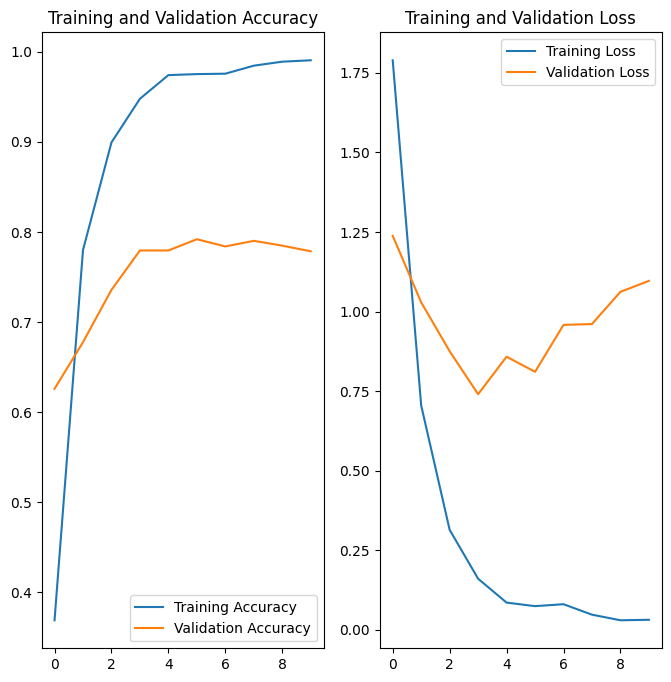

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [9]:
def upload_and_predict():
    # Upload an image file
    uploaded = files.upload()
    image_path = next(iter(uploaded))  # Get the first uploaded file

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)  # Convert it to a numpy array
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Expand dimensions to fit model input
    img_tensor /= 255.  # Normalize the image

    # Predict the aircraft type
    predictions = model.predict(img_tensor)
    predicted_class_index = np.argmax(predictions[0])
    class_labels = list(train_generator.class_indices.keys())  # Retrieve class labels from the generator
    predicted_label = class_labels[predicted_class_index]

    # Display the image and prediction
    plt.imshow(img)  # Display the uploaded image
    plt.title(f'Predicted Aircraft: {predicted_label}')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

    return predicted_label


Saving C-135.JPG to C-135.JPG
1/1 [==============================] - 0s 19ms/step


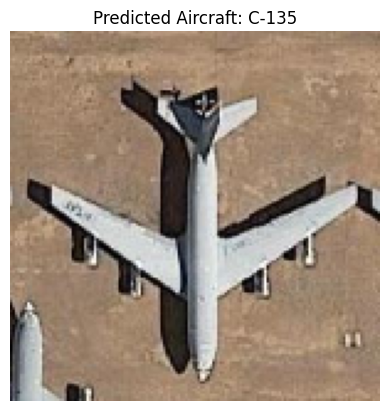

The predicted aircraft is: C-135


In [13]:
predicted_aircraft = upload_and_predict()
print(f'The predicted aircraft is: {predicted_aircraft}')
